# Classification Modeling on Adult Income Dataset:

#### All of the libraries I will be using for this proyect 

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [234]:
df = pd.read_csv('adult_income.csv')

#### Understanding the data
##### - Reading the columns and seeing the rows, check if any binary and get and idea of what we are working with
##### - Size of the dataset 

In [236]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [237]:
df.shape

(48842, 15)

#### Preprocessing
##### - Check missing values 
##### - Investigate to avoid dropping (try to sort the missing info. with possible answers in the same data)}
##### - Check outliers and how to handle them (dropping, mean or set to 0)
##### - Handle duplicates

In [239]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [240]:
print(df[df['workclass'].isnull()])  

       age workclass  fnlwgt     education  education_num  \
27      54       NaN  180211  Some-college             10   
61      32       NaN  293936       7th-8th              4   
69      25       NaN  200681  Some-college             10   
77      67       NaN  212759          10th              6   
106     17       NaN  304873          10th              6   
...    ...       ...     ...           ...            ...   
48682   61       NaN  265201  Some-college             10   
48769   21       NaN  212661  Some-college             10   
48800   73       NaN  144872       HS-grad              9   
48812   81       NaN   26711     Assoc-voc             11   
48838   64       NaN  321403       HS-grad              9   

              marital_status occupation    relationship                race  \
27        Married-civ-spouse        NaN         Husband  Asian-Pac-Islander   
61     Married-spouse-absent        NaN   Not-in-family               White   
69             Never-married  

### Analyzing the data I have some assumptions with it, looking at the column that are null we have 2 very similiar in numbers and when analyzing them is workclass and occupation they have correlation, which could mean null in workclass someone that doesn't work currently but moving to occupation there is a 10 person difference, meaning it could possibly be not currently working but occupation could be retired, student, etc. meaning this values could be valid just need to check and verify 

## Workclass null with Occupation not null. ex. I don't work (workclass null) but I'm a student (ocuppation not null)

In [243]:
df[df['workclass'].isnull() & df['occupation'].notnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


#### Looks like there is no situation where this is the case

## Occupation null with Workclass not null. ex. Workclass N/A and no Occupation since I don't work/have never worked

In [246]:
df[df['occupation'].isnull() & df['workclass'].notnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
46459,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K


In [247]:
df[df['occupation'].isnull() & df['workclass'].notnull()].shape[0]

10

#### We can see one of the hypothesis is correct since we do have results and the number of rows (10) is the same amount we previously stated.

## Check the rows where null both columns are null, which probably means they don't work/never worked and do nothing since they have no Occupation

In [250]:
df[df['workclass'].isnull() & df['occupation'].isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [251]:
df[df['workclass'].isnull() & df['occupation'].isnull()].shape[0]

2799

### - Looks like everything is correct, since both the missing columns where 2799 rows and 2809, which we did get 2799 in one of the filters and 10 in the other which combine make 2809.
### - Deciding what to do with them will be the important part, since they are quite a lot and it does make sense if people don't work and don't have an Occupation, at the end seems like all the 2809 null values refer to the same, not currently doing it.
### - Will be checking if there is a value among the lines no-currently or unemployed, etc, if there is I will be converting the nulls to that, if there isn't I will be converting to a new option in the row.

In [253]:
print(f"Unique options in Workclass column: {df['workclass'].value_counts()}")

Unique options in Workclass column: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [254]:
print(f"Unique options in Occupation column: {df['occupation'].value_counts()}")

Unique options in Occupation column: occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


## Checking the unique values for each column we can't see a current value that is closer to N/A in Occupation and Workclass, for Workclass we do see Never-worked but if it wasn't selected it means they have worked but not currently.
### - Changing the nulls -> unemployed in Workclass.
### - Changing the nulls -> none in Occupation.
#### For Occupation I wasn't able to find any other term, I was think no occupation, but 2 words make it a bit different to handle later on.

In [256]:
df['workclass'] = df['workclass'].fillna("unemployed")

In [257]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unemployed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [258]:
df['occupation'] = df['occupation'].fillna("none")

In [259]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
none                 2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

## Nulls for Occupation and Workclass have been handle correctly.
### - Handle nulls for native_country, for this I will be comparing with race

In [261]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

#### Looks like race is not a good way to find native country, I will be doing by groupby meaning the most commun country per race

In [263]:
country_by_race = df.groupby('race')['native_country'].apply(lambda x: x.mode()[0])

df['native_country'] = df.apply(lambda row:country_by_race[row['race']] if pd.isnull(row['native_country']) else row ['native_country'], axis=1)

In [264]:
df['native_country'].value_counts()

native_country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

## Null values have been handle correctly
#### - Handle duplicate values

In [266]:
df.duplicated().sum()

52

In [267]:
df = df.drop_duplicates()

In [268]:
df.duplicated().sum()

0

# Outliers
#### - Visualize the outliers
#### - Decide how to handle them, using mean or 0 since dropping is not an option

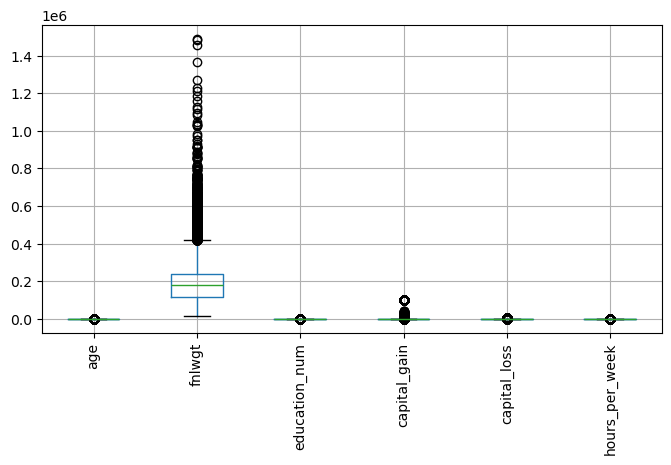

In [270]:
plt.figure(figsize=(8, 4))
df.drop(columns=["income"]).boxplot()
plt.xticks(rotation=90)
plt.show()

### Leaving the outliers is being cosider since I feel like altering columns like capital gain and fnwgt could make a lot of difference when it comes to my model, most of the columns could be used for important data that putting the mean or square root feels like it will be messing with the dataset too much 

## Observations with the numerical columns

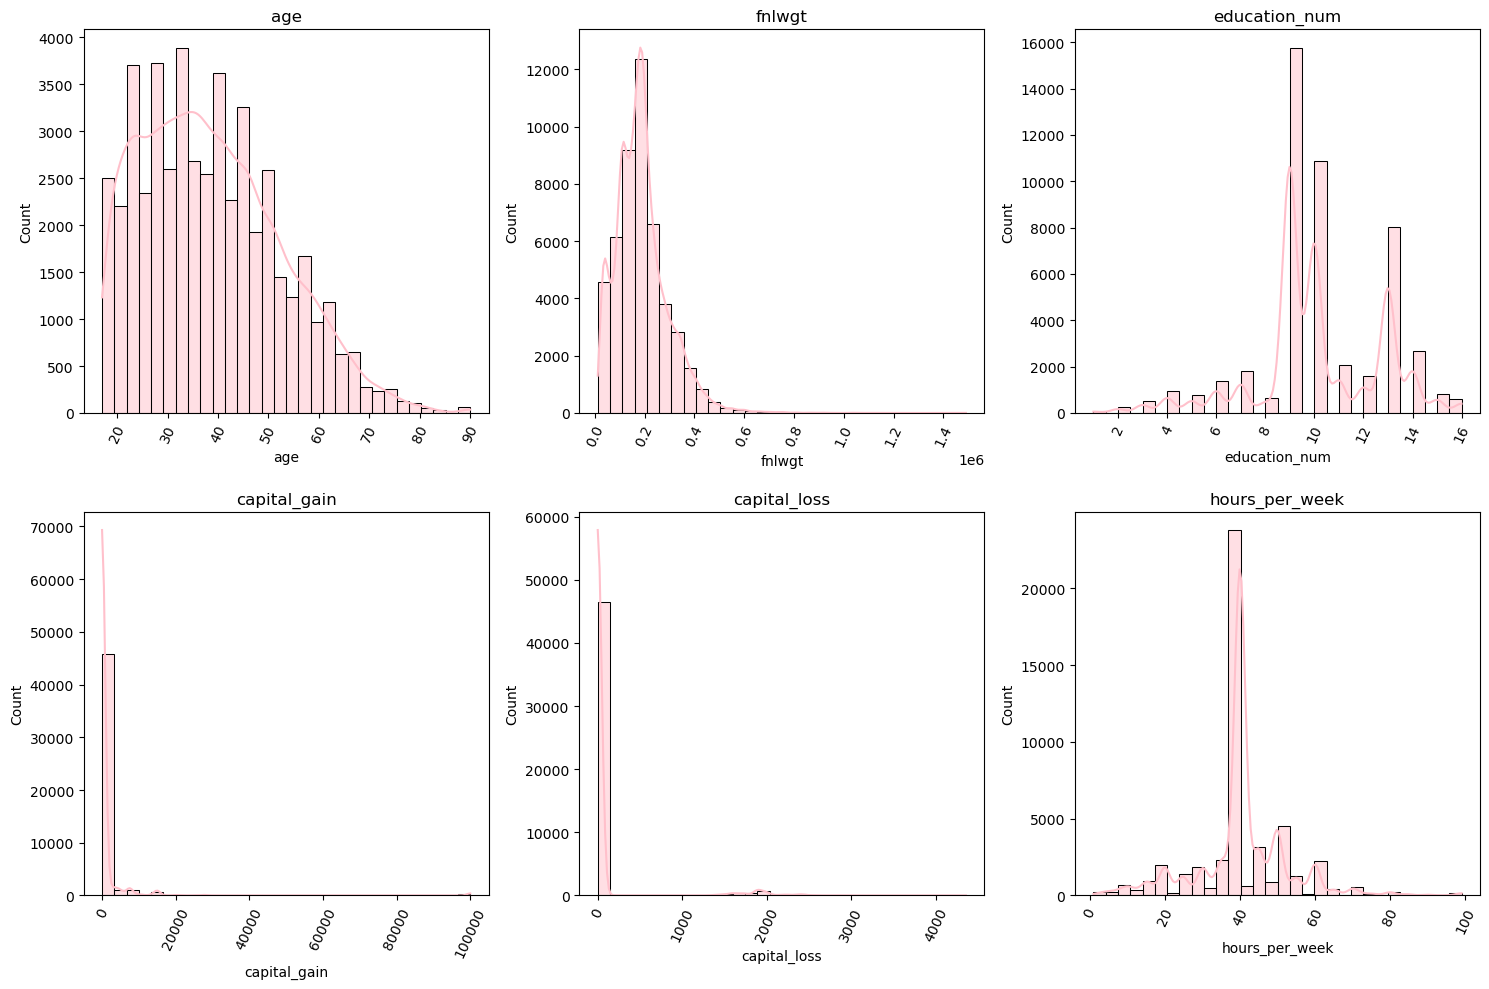

In [273]:
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(15, 10))


for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  
    sns.histplot(df[col], kde=True, color='pink', bins=30, edgecolor='black')
    plt.title(col)  
    plt.xticks(rotation=65)

plt.tight_layout() 
plt.show()

## Observations
#### - We can see the outliers defenetly are present but also reinforces the idea of leaving them was the correct one, for example hours per week the outlier is 40 since you can see the spike but 40 is the normal full time job, age which was the only one that I didn't feel it will be having a big impact if I did mean or square root change seems to be peaking more because the end of it is so low that it makes the beginng making the outliers look more extreme 

# Encoding 
#### - Perform encoding for the categorical columns
#### - Between Label Encoding, One hot Encoding and Ordinal Encoding 
#### - Will be doing different encodings for different columns
#### Label Encoding -> Sex/Income
#### One-hot -> Workclass/Occupation/Maritial Status/Relationship/Race/Native Country

### Hoping the space is enough and used the binary columns as label.
#### Why I choose One-hot for all the columns, except binary columns, since label encoding assigns a number for each one of them I have been reading it will be assuming the numbers have importance, meaning will be thinking a column is more important than the other one and numbers that are closer will be assumed to be more similar in some way to another...which is not true hands why I'm mostly doing one-hot even do it will be taking so much more space

# Label encoding 
##### Only Sex and Income

In [277]:
#df.dtypes
le = LabelEncoder()
#df['sex'] = le.fit_transform(df['sex'])
for col in ['sex', 'income']:
    df[col] = le.fit_transform(df[col])

# One-hot encoding
##### Only Workclass/Occupation/Maritial Status/Relationship/Race/Native Country

In [279]:
df = pd.get_dummies(df, columns=['workclass', 'occupation', 'marital_status', 'relationship', 'race', 'native_country'], drop_first=True)

In [280]:
df

,age,fnlwgt,education,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,Bachelors,13,1,2174,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,Bachelors,13,1,0,0,13,0,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,HS-grad,9,1,0,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,11th,7,1,0,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,Bachelors,13,0,0,0,40,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,Bachelors,13,0,0,0,36,0,False,...,False,False,False,False,False,False,False,True,False,False
48838,64,321403,HS-grad,9,1,0,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,Bachelors,13,1,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,Bachelors,13,1,5455,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False


### For Education seems like it's already encoded that why I'm not encoding it, just need to understand how the values correlate with the numbers

In [282]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

#### With this being set I will be dropping 'education'

In [284]:
df = df.drop('education', axis=1)

In [285]:
df

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,0,36,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,64,321403,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,1,5455,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False


# Understanding the already encoded 'education' column 
#### In order of importancy it will go like this:
####  Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 
####  10th, 11th, 12th, HS-grad, Some-college,
####  Assoc-voc, Assoc-acdm, Bachelors, Masters, Prof-school, Doctorate

# Correlation Matrix

<Axes: >

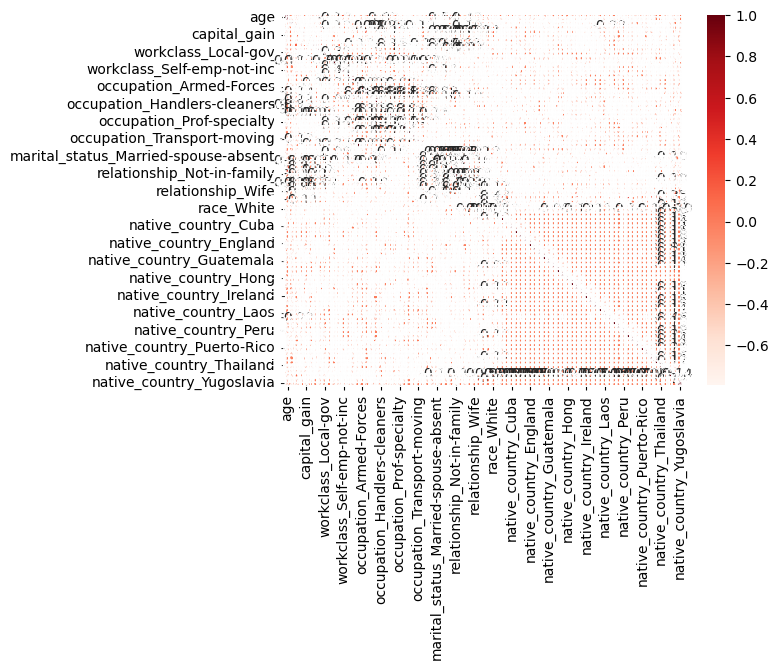

In [291]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f')

In [297]:
correlation_matrix = df.corr()
correlation_matrix

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
age,1.000000,-0.076451,0.030635,0.088043,0.077185,0.056838,0.071223,0.230144,0.057801,-0.019587,...,0.006995,0.005437,0.012275,-0.001976,-0.011905,-0.001784,0.001041,0.012933,-0.012373,0.002892
fnlwgt,-0.076451,1.000000,-0.038727,0.027879,-0.003715,-0.004378,-0.013521,-0.006309,0.001221,0.003439,...,-0.013584,0.008708,-0.006526,-0.010348,-0.001735,-0.001513,0.004154,-0.074135,-0.007484,0.004700
education_num,0.030635,-0.038727,1.000000,0.009364,0.125219,0.080986,0.143915,0.332802,0.097227,-0.014367,...,-0.047870,-0.041830,0.000902,0.012982,0.045450,0.007282,-0.010217,0.127395,-0.007563,-0.005810
sex,0.088043,0.027879,0.009364,1.000000,0.047127,0.045517,0.228529,0.214639,-0.038751,0.000959,...,0.009656,-0.009941,-0.002178,-0.005272,0.003044,-0.007120,-0.009346,-0.006444,-0.001544,0.005266
capital_gain,0.077185,-0.003715,0.125219,0.047127,1.000000,-0.031475,0.082152,0.223047,-0.009913,-0.002074,...,-0.004361,-0.006147,-0.002320,0.003898,0.004254,-0.002784,-0.003043,0.010191,-0.002679,-0.000477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_Thailand,-0.001784,-0.001513,0.007282,-0.007120,-0.002784,-0.002344,0.008555,-0.004229,-0.003130,-0.000355,...,-0.000920,-0.001526,-0.000515,-0.001206,-0.000906,1.000000,-0.000584,-0.081438,-0.001042,-0.000539
native_country_Trinadad&Tobago,0.001041,0.004154,-0.010217,-0.009346,-0.003043,0.004022,-0.002918,-0.009117,0.000940,-0.000337,...,-0.000873,-0.001448,-0.000488,-0.001144,-0.000859,-0.000584,1.000000,-0.077256,-0.000989,-0.000511
native_country_United-States,0.012933,-0.074135,0.127395,-0.006444,0.010191,0.011340,0.008129,0.037679,0.032152,0.004361,...,-0.121749,-0.202004,-0.068129,-0.159585,-0.119916,-0.081438,-0.077256,1.000000,-0.137963,-0.071301
native_country_Vietnam,-0.012373,-0.007484,-0.007563,-0.001544,-0.002679,-0.000128,-0.008305,-0.015561,-0.003044,-0.000602,...,-0.001558,-0.002585,-0.000872,-0.002043,-0.001535,-0.001042,-0.000989,-0.137963,1.000000,-0.000913


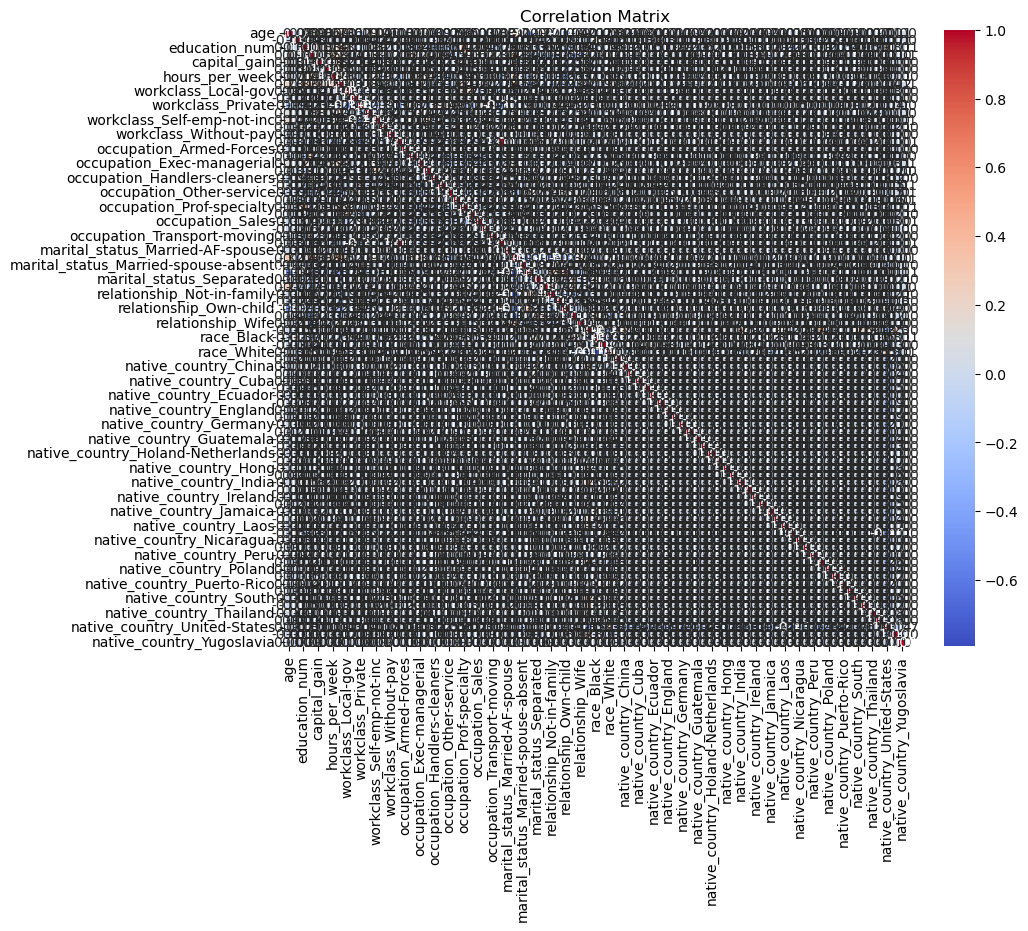

In [299]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## As feared the One-hot encoding wa too much for the data to be visualize and if I'm having issues now I will probably have complications in the future, for this I will be going back and focusing most of my encoding to Label encoding. 